# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.613  1  1.157 0.284 0.006   
                             age        0.099  1  0.187 0.666 0.001   
                             Kiel       1.870  1  3.526 0.062 0.018   
                             Magdeburg  3.990  1  7.523 0.007 0.038   
                             Sweden     6.174  1 11.640 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.612  1  0.623 0.431 0.003   
                             age        2.031  1  2.066 0.152 0.011   
                             Kiel       0.086  1  0.088 0.768 0.000   
                             Magdeburg  1.941  1  1.975 0.162 0.010   
                             Sweden    17.261  1 17.558 0.000 0.084   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.547  0.446    False  
                             age               0.177  0.782    False  
                             Kiel              1.208  0.144    False  
                             Magdeburg         2.176  0.024     True  
                             Sweden            3.103  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.366  0.590    False  
                             age               0.817  0.284    False  
                             Kiel              0.115  0.856    False  
                             Magdeburg         0.792  0.296    False  
                             Sweden            4.371  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.133  1  8.314 0.004 0.042   
                             age        0.010  1  0.070 0.792 0.000   
                             Kiel       0.245  1  1.796 0.182 0.009   
                             Magdeburg  0.351  1  2.574 0.110 0.013   
                             Sweden     1.476  1 10.830 0.001 0.054   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.352  1  4.320 0.039 0.022   
                             age        0.897  1  1.647 0.201 0.009   
                             Kiel       2.819  1  5.178 0.024 0.026   
                             Magdeburg  2.637  1  4.843 0.029 0.025   
                             Sweden    15.248  1 28.005 0.000 0.128   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.358  0.013     True  
                             age               0.101  0.860    False  
                             Kiel              0.741  0.294    False  
                             Magdeburg         0.958  0.200    False  
                             Sweden            2.925  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.409  0.086    False  
                             age               0.697  0.317    False  
                             Kiel              1.620  0.058    False  
                             Magdeburg         1.538  0.067    False  
                             Sweden            6.481  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.004         2.358  0.013     True   
                             age       0.792         0.101  0.860    False   
                             Kiel      0.182         0.741  0.294    False   
                             Magdeburg 0.110         0.958  0.200    False   
                             Sweden    0.001         2.925  0.004     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.039         1.409  0.086    False   
                             age       0.201         0.697  0.317    False   
                             Kiel      0.024         1.620  0.058    False   
                             Magdeburg 0.029         1.538  0.067    False   
                             Sweden    0.000         6.481  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.284         0.547  0.446    False  
                             age       0.666         0.177  0.782    False  
                             Kiel      0.062         1.208  0.144    False  
                             Magdeburg 0.007         2.176  0.024     True  
                             Sweden    0.001         3.103  0.004     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.431         0.366  0.590    False  
                             age       0.152         0.817  0.284    False  
                             Kiel      0.768         0.115  0.856    False  
                             Magdeburg 0.162         0.792  0.296    False  
                             Sweden    0.000         4.371  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.227         3.240     0.282     0.260         2.475     0.337
std       0.294         6.163     0.320     0.302         5.303     0.330
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.001         0.406     0.002     0.004         0.332     0.014
50%       0.065         1.189     0.130     0.119         0.923     0.239
75%       0.393         3.225     0.524     0.466         2.445     0.621
max       0.999        86.704     0.999     1.000       147.179     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.004         2.358   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.511   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.292         0.534   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.596   
A0A075B6H7                                         AD     0.007         2.170   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.174         0.760   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.446         0.350   
S4R3U6                                             AD     0.039         1.409   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.013     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.423    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.379    False   
A0A075B6H7                                         AD      0.020     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.286    False   
Q9Y6X5                                             AD      0.284    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.160    False   
Q9Y6Y9                                             AD      0.576    False   
S4R3U6                                             AD      0.086    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.284         0.547   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.285   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.009   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.502         0.299   
A0A075B6H7                                         AD     0.154         0.813   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.060         1.225   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.268         0.572   
S4R3U6                                             AD     0.431         0.366   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.446    False  
A0A024R0T9;K7ER74;P02655                           AD      0.125    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.206    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.652    False  
A0A075B6H7                                         AD      0.286    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.245         1.547     0.306     0.255         1.401     0.338
std       0.295         1.811     0.317     0.291         1.638     0.317
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.008         0.367     0.023     0.011         0.357     0.037
50%       0.096         1.018     0.179     0.126         0.900     0.248
75%       0.429         2.081     0.560     0.439         1.943     0.598
max       0.998        21.573     0.998     0.997        22.880     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,958,1027


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.004         2.358  0.013   
A0A024R0T9;K7ER74;P02655                           0.031         1.511  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.292         0.534  0.423   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.254         0.596  0.379   
A0A075B6H7                                         0.007         2.170  0.020   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.286   
Q9Y6X5                                             0.174         0.760  0.284   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.160   
Q9Y6Y9                                             0.446         0.350  0.576   
S4R3U6                                             0.039         1.409  0.086   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.284   
A0A024R0T9;K7ER74;P02655                              False 0.052   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.098   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.502   
A0A075B6H7                                             True 0.154   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.060   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.268   
S4R3U6                                                False 0.431   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.547  0.446   
A0A024R0T9;K7ER74;P02655                                   1.285  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.009  0.206   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.299  0.652   
A0A075B6H7                                                 0.813  0.286   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.225  0.140   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.572  0.429   
S4R3U6                                                     0.366  0.590   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    899
CF (yes) - PI (yes)   335
CF (yes) - PI (no)    128
CF (no)  - PI (yes)    59
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.004         2.358  0.013     True 0.284   
A0A075B6H7                   0.007         2.170  0.020     True 0.154   
A0A075B6H9                   0.019         1.711  0.048     True 0.375   
A0A075B6I0                   0.001         3.107  0.003     True 0.024   
A0A075B6R2                   0.001         3.294  0.002     True 0.439   
...                            ...           ...    ...      ...   ...   
Q9UMX0;Q9UMX0-2;Q9UMX0-4     0.018         1.754  0.044     True 0.934   
Q9UNW1                       0.464         0.334  0.592    False 0.009   
Q9UP79                       0.000         3.973  0.001     True 0.481   
Q9UQ52                       0.000         3.402  0.002     True 0.048   
Q9Y6C2                       0.009         2.050  0.025     True 0.836   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.547  0.446    False       186  
A0A075B6H7                           0.813  0.286    False        91  
A0A075B6H9                           0.426  0.538    False       189  
A0A075B6I0                           1.627  0.067    False       194  
A0A075B6R2                           0.358  0.598    False       164  
...                                    ...    ...      ...       ...  
Q9UMX0;Q9UMX0-2;Q9UMX0-4             0.030  0.963    False        57  
Q9UNW1                               2.048  0.031     True       171  
Q9UP79                               0.318  0.634    False       135  
Q9UQ52                               1.323  0.117    False       188  
Q9Y6C2                               0.078  0.903    False       119  

[187 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.013,0.446,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.125,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.423,0.206,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.379,0.652,196,CF (no) - PI (no)
A0A075B6H7,0.020,0.286,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.286,0.315,197,CF (no) - PI (no)
Q9Y6X5,0.284,0.140,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.160,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17302,0.000,0.982,135,CF (yes) - PI (no),0.982
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.001,0.949,134,CF (yes) - PI (no),0.948
O00187;O00187-2,0.037,0.964,119,CF (yes) - PI (no),0.927
Q9UMX0;Q9UMX0-2;Q9UMX0-4,0.044,0.963,57,CF (yes) - PI (no),0.918
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.955,0.038,176,CF (no) - PI (yes),0.917
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.055,197,CF (yes) - PI (no),0.009
P00740;P00740-2,0.044,0.053,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


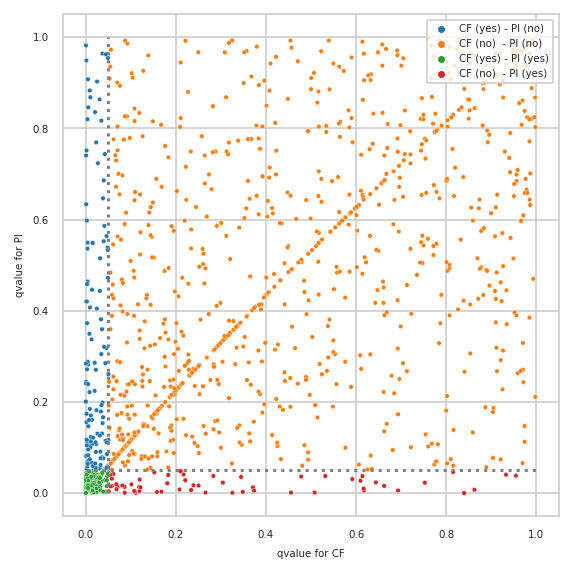

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


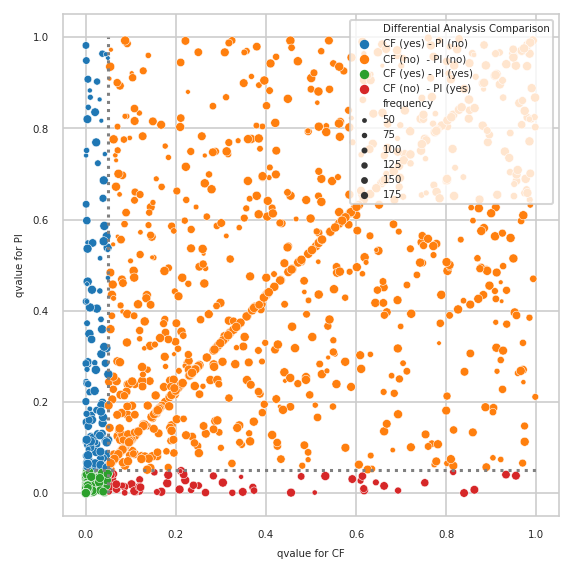

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out